## Proto Type 2. 모델링 정확도 올리기 

#### 1.문제점
 1-1.데이터 분류 9개로 증가 시켜서 데이터 수를 늘렸으나 정확도의 큰개선이 보이지 않음
 1-2.데이터의 문제가 아닐 수 있다.
### 2.실험 내용
 2-1. 데이터 분류를 9개로 늘린 후 다층 퍼셉트론 모델로 진행(실패)

#### 2-2. 데이터 분류로 안되는 경우 이미지 보강을 통하여 다층 퍼셍트론으로 진행

 2-3. 위 결과에 따라 데이터 문제인지 모델의 문제인지 파악 하기
 

### 결과
1. 정확도 
 282/282 [==============================] - 0s 1ms/step - loss: 2.1638 - accuracy: 0.8742
[2.1637821197509766, 0.8742222189903259]

2. 예측값
 [[1.9477404 1.        1.000071  1.0001354 1.0002316 1.        1.0513043 1.0005172 1.       ]]

 0번째는 티셔츠 94%확률로 정확하게 측정해냄. 

3.문제는 셔플이였음. 데이터 이미지 보강의 문제는 아님

In [1]:
#라이브러리 가져오기
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [2]:
#센달을 제외한 데이터 분류 하기
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# sorting based on index
idx = np.argsort(train_labels)
train_images = train_images[idx]
train_labels = train_labels[idx]

idx = np.argsort(test_labels)
test_images = test_images[idx]
test_labels = test_labels[idx]

labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label_mapping = dict(zip(labels, range(10)))

def get_data(mapping, classes):
    # X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])
    X_train, X_test, y_train, y_test = [],[],[],[]
    for cls in classes:
        idx = mapping[cls]
        start = idx*6000
        end = idx*6000+6000
        X_train.append(train_images[start: end])
        # X_train = np.append(X_train, train_images[start: end])
        y_train.append(train_labels[start: end])
        # y_train = np.append(X_train, train_labels[start: end])
        start = idx*1000
        end = idx*1000+1000
        X_test.append(test_images[start: end])
        # X_test = np.append(X_test, test_images[start: end])
        y_test.append(test_labels[start: end])
        # y_test = np.append(y_test, test_labels[start: end])
    return X_train, X_test, y_train, y_test


train_X, test_X, train_Y, test_Y = get_data(label_mapping, 
                                            classes=["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Shirt", "Sneaker", "Bag", "Ankle boot"])

test_Y



4423680/4422102 [==============================] - 0s 0us/step


[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [3]:
# test_Y each array -->sum 1array 
empty_array1 = np.array([])
# print(type(d))
for arr in test_Y:
    if arr[0] == 9:
        arr[:] = 5
    # print(type(arr))
    empty_array1 = np.append(empty_array1,arr)
test_Y = empty_array1

# train_Y 5개의 어레이를 1개의 어레이로 만들기
empty_array2 = np.array([])

for arr in train_Y:
    if arr[0] == 9:
        arr[:] = 5
    empty_array2 = np.append(empty_array2, arr)
train_Y = empty_array2

test_Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [4]:
# test_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정.
for idx, img in enumerate(test_X):
    if idx == 0 :
        test_img0 = img
    elif idx == 1:
        test_img1 = img
    elif idx == 2:
        test_img2 = img
    elif idx == 3:
        test_img3 = img
    elif idx == 4:
        test_img4 = img
    elif idx == 5:
        test_img5 = img
    elif idx == 6:
        test_img6 = img
    elif idx == 7:
        test_img7 = img
    else:
        test_img8 = img
print(test_img0.shape, test_img1.shape, test_img2.shape, test_img3.shape, test_img4.shape, test_img5.shape, test_img6.shape, test_img7.shape, test_img8.shape)

# train_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정
for idx, img in enumerate(train_X):
    if idx == 0 :
        train_img0 = img
    elif idx == 1:
        train_img1 = img
    elif idx == 2:
        train_img2 = img
    elif idx == 3:
        train_img3 = img
    elif idx == 4:
        train_img4 = img
    elif idx == 5:
        train_img5 = img
    elif idx == 6:
        train_img6 = img
    elif idx == 7:
        train_img7 = img
    else:
        train_img8 = img
print(train_img0.shape, train_img1.shape, train_img2.shape, train_img3.shape, train_img4.shape, train_img5.shape, train_img6.shape, train_img7.shape, train_img8.shape)


(1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28)
(6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28)


In [5]:
# test_X 하나로 합쳐주는 과정 1번만 진행 해야 합니다.
test_img0 = np.vstack((test_img0, test_img1))
test_img0 = np.vstack((test_img0, test_img2))
test_img0 = np.vstack((test_img0, test_img3))
test_img0 = np.vstack((test_img0, test_img4))
test_img0 = np.vstack((test_img0, test_img5))
test_img0 = np.vstack((test_img0, test_img6))
test_img0 = np.vstack((test_img0, test_img7))
test_X = np.vstack((test_img0, test_img8))

# train_X 하나로 합쳐주는 과정
train_img0 = np.vstack((train_img0, train_img1))
train_img0 = np.vstack((train_img0, train_img2))
train_img0 = np.vstack((train_img0, train_img3))
train_img0 = np.vstack((train_img0, train_img4))
train_img0 = np.vstack((train_img0, train_img5))
train_img0 = np.vstack((train_img0, train_img6))
train_img0 = np.vstack((train_img0, train_img7))
train_X = np.vstack((train_img0, train_img8))

print(train_X.shape, test_X.shape)

(54000, 28, 28) (9000, 28, 28)


In [6]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((54000, 28, 28), (9000, 28, 28), (54000,), (9000,))

In [7]:
#shuffle 해주기
from sklearn.utils import shuffle
train_X, train_Y = shuffle(train_X, train_Y)
test_X, test_Y = shuffle(test_X, test_Y)

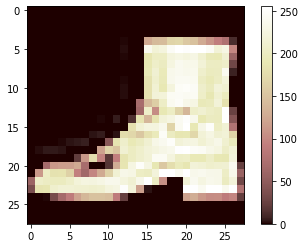

In [8]:
plt.imshow(train_X[2], cmap='pink')
plt.colorbar()
plt.show()
# print('정답범주', train_Y[2])

## ResNet50 모델 사용하기

In [26]:
from keras.applications.resnet50 import ResNet50, decode_predictions
# from keras.layers import Dense, Input, Activation
# from keras.models import Model
# from keras.callbacks import EarlyStopping
# from keras import optimizers
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers.normalization import BatchNormalization

In [27]:
resnet = ResNet50()

In [28]:
# ResNet50 구조 보기
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [29]:
# 이게 뭔지 모르겠다
import tqdm

In [31]:
# 이미지 전처리
train_X = train_X / 255.0
test_X = test_X / 255.0

In [32]:
# reshape
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [36]:
import tensorflow.compat.v1 as tf

with tf.Session() as sess:
  X = tf.placeholder(tf.float32, [None, 28, 28, 1]),
  y = tf.placeholder(tf.float32, [None, 9])

In [38]:
def resnet(input):
    res = tf.nn.conv2d(input, tf.Variable(tf.random_normal([3, 3, 32, 32])),
                       strides=[1, 1, 1, 1], padding='SAME')
    res = tf.nn.relu(res)
    res = tf.nn.conv2d(input, tf.Variable(tf.random_normal([3, 3, 32, 32])),
                       strides=[1, 1, 1, 1], padding='SAME')
    res = input + res
    res = tf.nn.relu(res)
    return res

In [39]:
layer = tf.nn.conv2d(X, tf.Variable(tf.random_normal([3, 3, 1, 32])),
                     strides=[1, 1, 1, 1], padding='SAME')

for i in range(5):
    layer = resnet(layer)

UnboundLocalError: ignored

In [40]:
final = tf.nn.conv2d(layer, tf.Variable(tf.random_ormal([3, 3, 32, 1])),
                     strides=[1, 1, 1, 1], padding='SAME')

flatten = tf.reshape(final, [-1, final.get_shape()[1:4].num_elements()])
W = tf.Variable(tf.random_normal([final.get_shape()[1:4].num_elements(), 10]))
result = tf.matmul(flatten, W)

NameError: ignored

In [41]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=result, labels=y))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(result, 1), tf.argmax(y, 1)), dtype=tf.float32))
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

NameError: ignored

In [42]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

TypeError: ignored

In [44]:
batch_size = 50

cost_list = []
acc_list = []
for i in range(100):
    # range(fashion_mnist.train.num_examples)
    for j in tqdm.tqdm_notebook(range(54000//batch_size)):
        _, c = sess.run([optimizer, cost], feed_dict = {X:train_X[j*batch_size: (j+1)*batch_size, :, :, :], y:train_Y[j*batch_size: (j+1)*batch_size, :]})
        cost_list.append(c)
        print("Epoch:{0}, Cost:{1}".format(i+1, np.mean(cost_list)))
        print("Accuracy :", sess.run(accuracy, feed_dict={X:test_X, y:test_Y}))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


NameError: ignored

In [ ]:
# 밑에 vggnet 모방 코드 사용 하려면 여기 셀 실행 해야함/ input 을 맞춰주기 위함.

print(train_X.shape, test_X.shape)
# (미니배치크기, 입력이미지행수, 입력이미지열수, 입력이미지체널수)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(54000, 28, 28) (9000, 28, 28)
(54000, 28, 28, 1) (9000, 28, 28, 1)


In [ ]:
print(train_X.shape, test_X.shape)
# (미니배치크기, 입력이미지행수, 입력이미지열수, 입력이미지체널수)
# train_X = train_X.reshape(-1, 28, 28, )
# test_X = test_X.reshape(-1, 28, 28, 0)
# print(train_X.shape, test_X.shape)

(54000, 28, 28, 1) (9000, 28, 28, 1)


### 이미지 추가 연습 

In [ ]:
#이미지 추가 생성 연습

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False)

In [ ]:
augment_size = 100
x_augmented = image_generator.flow(x = np.tile(A = train_X[0].reshape(28*28), 
                                             reps = 100).reshape(-1,28,28,1),
                                 y =  np.zeros(augment_size),batch_size = augment_size,
                                 shuffle = False).next()[0]
print(x_augmented.shape)
x_augmented_1 = image_generator.flow(x = x_augmented, y = np.zeros(augment_size),
                                     batch_size = augment_size,shuffle = False).next()[1]

print(x_augmented_1.shape)                           

(100, 28, 28, 1)
(100,)


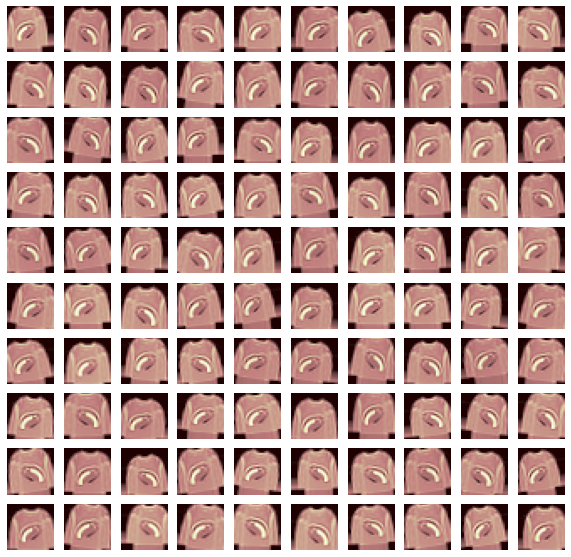

In [ ]:
#이미지 보강 확인
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(x_augment[i].reshape(28,28), cmap='pink')
plt.show()


### 이미지 추가 생성 시작

In [ ]:
augment_size =27000

#원본 이지미 무작위 선택 및 데이터 복사
x_choice = np.random.choice(train_X.shape[0], size = augment_size, replace=False)
x_augmented = train_X[x_choice].copy()
y_augmented = train_Y[x_choice].copy()

#이미지를 변형할 원본 이미지를 찾기 위한 함수 예제(중복허용 0/중복허용 x)
print(np.random.randint(train_X.shape[0], size = augment_size))
print(np.random.choice(train_X.shape[0], size = augment_size, replace=False))

[ 2948 45839 38165 33885 24734 49473 42505 32024 44855 21837 45249 31751 13892 44168 51341 31570 39096 20383  3634 53877 40297 50475 10360 37381 23578   910 42292 14259 51422 53743  7610 46883 11303 43352 46747 34161  6247 23195 46854 10688 17410 40184 13974 39679 34649 28880 20227 23457  3666 12453 49271 20752  1841 20445 11883 11661 31375 13304  2397 18557 32651  6011 23700 29802 29687 25212 19272 39047 28005 38040 53631 47163  2933  5618 11688 24587 24558  5367 39236 29278  6669 34928 45395 53781 14974 31706 50644  7192  5369 20650 28359 45310 12664 24831 44995 52518 44808  9707 53921 16593 42042   432 35810   587 32908  5281 19899 49927 11850 12132 27076 15245  8735 30366 20067 13047 23191 38993 11022 52142  1529  2926 50729 29672 16793 21771  2923  5008 44229 30489 45928 31597 29999 15713 21009 30799 17098  2920 18956 29571 50071  6466 28533 39293 50614 14907 49254 29126  9789 18760 50985 47929 12223 24856 48108  6713 41445  9823 34927 11437 47444 27287 23238 41759 50868 11990  10

In [ ]:
#보강 이미지 데이터 생성 
x_augmented = image_generator.flow(x = x_augmented, y = np.zeros(augment_size),
                                   batch_size = augment_size, shuffle = False).next()[0]

In [ ]:
x_augmented_1 = image_generator.flow(x = x_augmented, 
                                 y = np.zeros(augment_size),
                                 batch_size = augment_size,  
                                 shuffle = False).next()[1]   

In [ ]:
print(x_augmented.shape)
print(x_augmented_1.shape)

(27000, 28, 28, 1)
(27000,)


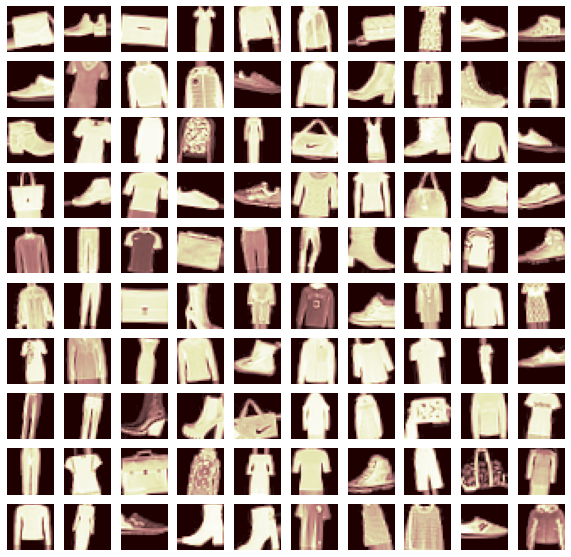

In [ ]:
#보강 이미지 확인
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(x_augmented[i].reshape(28,28), cmap='pink')
plt.show()

In [ ]:
#데이터 합쳐주기 
train_X = np.concatenate((train_X,x_augmented))
train_Y = np.concatenate((train_Y,y_augmented))

#보강 데이터 결합 확인
print(train_X.shape)

(81000, 28, 28, 1)


In [ ]:
#min-max-regulation 최소 최대값 데이터 평준화
train_X = train_X / 255.0
test_X = test_X / 255.0
# print(train_X[2])

In [ ]:
# 다층 퍼셉트론 모델로 훈련
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=9, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 1161      
Total params: 101,641
Trainable params: 101,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_Y, epochs=500, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=500, monitor='val_loss')])

Epoch 1/500
1899/1899 [==============================] - 4s 2ms/step - loss: 0.5517 - accuracy: 0.8044 - val_loss: 0.8462 - val_accuracy: 0.6898
Epoch 2/500
1899/1899 [==============================] - 4s 2ms/step - loss: 0.4342 - accuracy: 0.8405 - val_loss: 0.7756 - val_accuracy: 0.7027
Epoch 3/500
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8532 - val_loss: 0.7238 - val_accuracy: 0.7222
Epoch 4/500
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3721 - accuracy: 0.8621 - val_loss: 0.7154 - val_accuracy: 0.7320
Epoch 5/500
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3514 - accuracy: 0.8699 - val_loss: 0.6820 - val_accuracy: 0.7402
Epoch 6/500
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.8736 - val_loss: 0.6955 - val_accuracy: 0.7331
Epoch 7/500
1899/1899 [==============================] - 4s 2ms/step - loss: 0.3232 - accuracy: 0.8794 - val_loss: 0.6865 - val_ac

In [ ]:
#훈련된 모델 저장
model.save('fAIshion_P_protoT2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fAIshion_P_protoT2/assets


###저장된 모델 가져오기

In [ ]:
#저장된 모델 가져오기
model = load_model('/content/fAIshion_P_protoT2')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1161      
Total params: 101,641
Trainable params: 101,641
Non-trainable params: 0
_________________________________________________________________


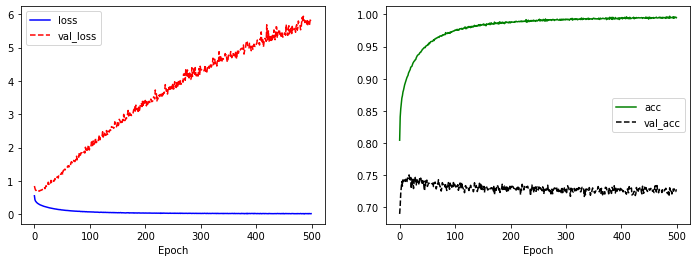

In [ ]:
#모델 학습 후 로스값과 정확도의 이미지 처리
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
#최 종 적확도 확인 
model.evaluate(test_X,test_Y)

282/282 [==============================] - 0s 1ms/step - loss: 2.1638 - accuracy: 0.1184


[2.1637821197509766, 0.11844444274902344]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(225, 225, 3)
########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


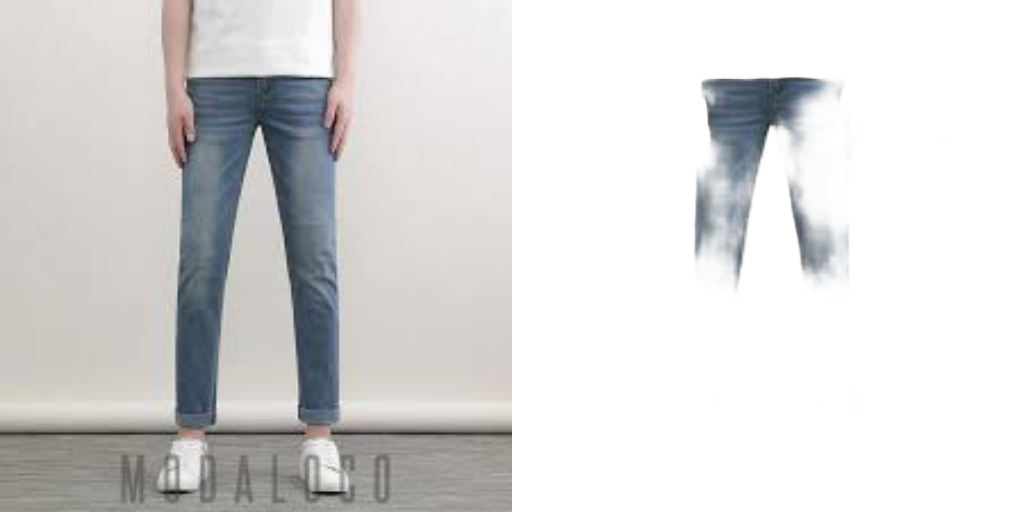

In [ ]:
#기존 우리의 openCV를 통해 의류를 분류해 내기

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/drive/My Drive/test_1/test_5.jpg'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/fAIshion_P/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb ----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        print(file.shape)

        # b,g,r= cv2.split(file)
        # file = cv2.merge([b,g,r])

        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)
cv2_imshow(image)
# print(image.shape)

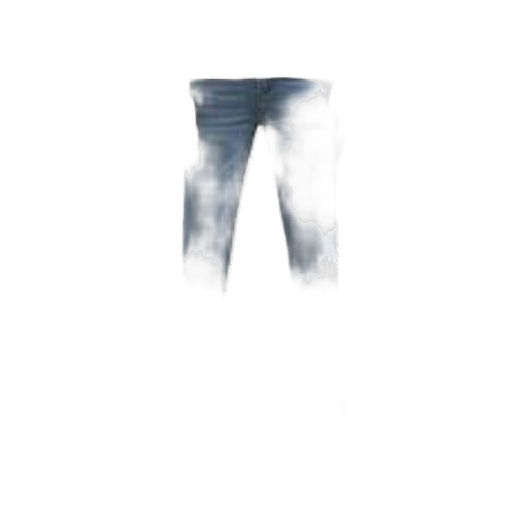

In [ ]:
# 이미지 자르고, 투명값 검정배경 입혀주기.

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
# cv2_imshow(image_crop)

for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

cv2_imshow(image_crop)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  71  91  84  74  79  89 118 106   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  97  92  74  61  78 102   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 100 106  79  56  64   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 128 103  87   0  61   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 132  87  81   0   0   0   0   0   

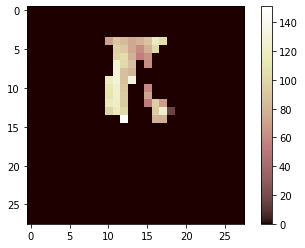

(1, 28, 28)

In [ ]:
# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))
cv2_imshow(image_resize)

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)
print(image_gray)

# 조금 더 크게 시각화..
plt.imshow(image_gray, cmap='pink')
plt.colorbar()
plt.show()

# 정규화 해준다.
input_image = image_gray/255.0

# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28))
input_image.shape

In [ ]:
# 기존 데이터 예측 범주
# 0 : 티셔츠 / 상의
# 1 : 바지
# 2 : 스웨터
# 3 : 드레스
# 4 : 코트
# 5 : 샌들
# 6 : 셔츠
# 7 : 운동화
# 8 : 가방
# 9 : 부츠


# 수정한 데이터 범주 순서
# ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Shirt", "Sneaker", "Bag", "Ankle boot"]

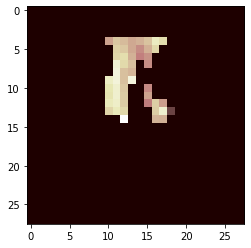

[[1. 1. 1. 1. 1. 1. 1. 1. 2.]]


In [ ]:
#예측 수행
input_predict = model.predict(input_image)+1
#예측 이미지 확인 
plt.imshow(input_image.reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인 
print(input_predict)

In [ ]:
max_value = np.max(input_predict)
# print(max_value)
max_idx = np.where(input_predict == max_value)
# print(max_idx)
# print(max_idx[1][0])
predict_idx = max_idx[1][0]
predict_idx

8